* ### Triad - A knows 2 people : B and C where B and C are unknown to eachother
* ### Triadic Closure - When there forms a link between B and C in the above triad
* ### Neighborhood Overlap between 2 nodes A and B = ( no of common neighbors of A and B ) / ( total no of unique neighbors of A and B )
* ### Neighborhood Overlap is directly proportional to strength of the link
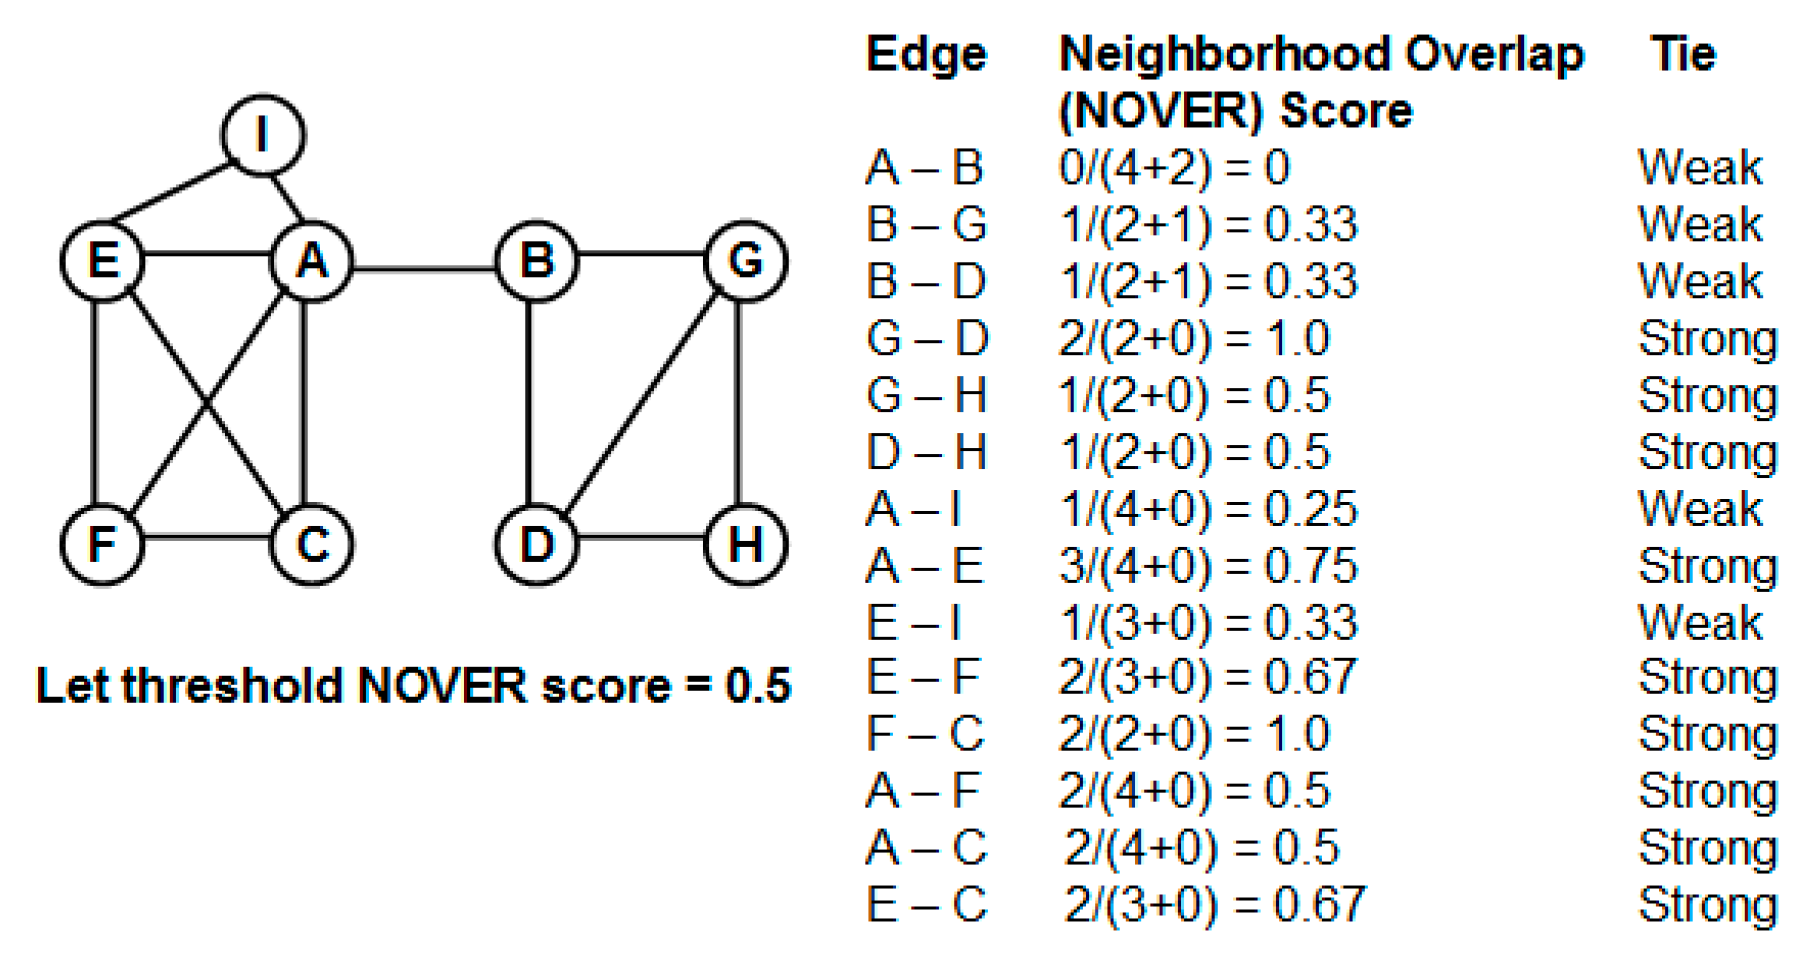

* ### Bridge in a graph - an edge which, when removed, makes the graph disconnected
* ### Local Bridge in a graph - bridge between nodes A and B is said to be local bridge if they have no common friends
* ### Every bridge is a local bridge 

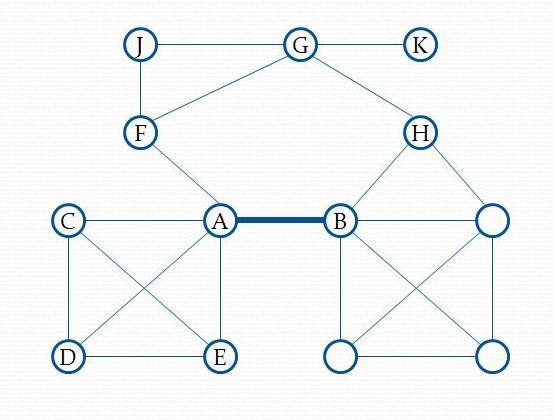

### In this graph
* ### Bridge : GK
* ### Local Bridge : AB, GK

* ### Embeddedness of an edge AB = Number of common neighbors A and B have

* ### Structural holes - “empty space” between contacts in a person's network. It means that these contacts do not interact closely (though they may be aware of one another). 
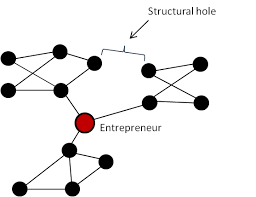

* ### Social Capital - potential ability to obtain resources, favors, or information from one's personal connections.
* ### Community Partitioning - A partitioning is called community partitioning if there is a lot of inter-community edge sparsity and intra-community edge density. (intra-within , inter-between)
* ### For a good community ratio of intra-community edges to inter-community edge should be high

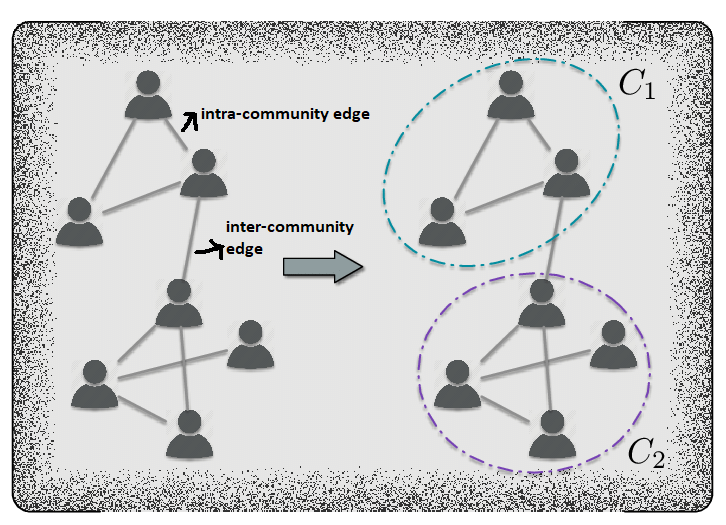

* ### Betweenness Centrality - measures how often a node occurs on all shortest paths between two nodes.
* ### Betweenness of a node N = ( number of shortest paths between nodes (v1,v2) that passes through node N ) / ( total number of shortest paths between (v1,v2) )

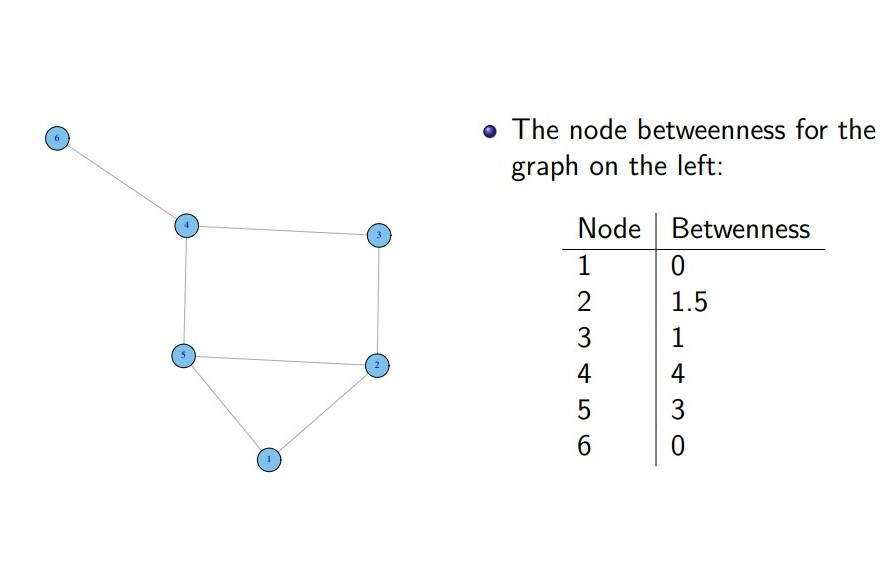

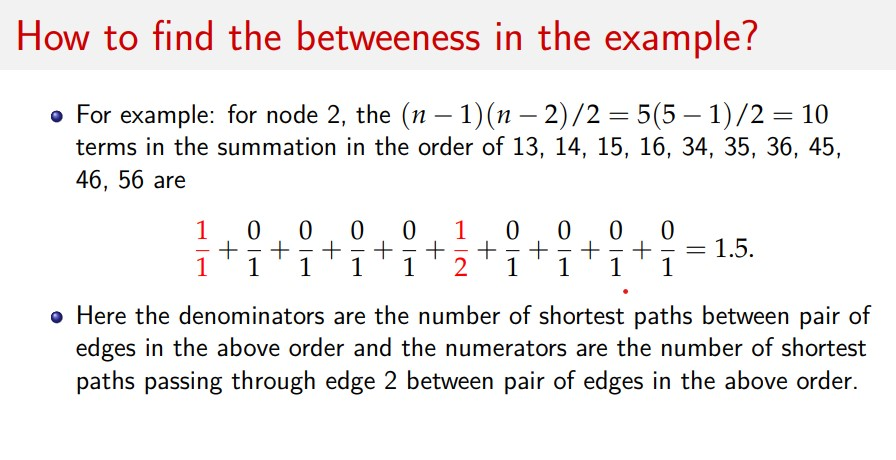

In [ ]:
!pip install networkx==2.4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached networkx-2.4-py3-none-any.whl (1.6 MB)
  Attempting uninstall: networkx
    Found existing installation: networkx 2.1
    Uninstalling networkx-2.1:
      Successfully uninstalled networkx-2.1


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import scipy
import itertools

## Finding Communities in Graph - Brute Force Method

In [ ]:
def communities_brute(G):
  nodes= G.nodes()
  n= G.number_of_nodes()
  e= G.number_of_edges()

  first_community= []
  for i in range(1,n//2+1):
    comb= [list(x) for x in itertools.combinations(nodes,i)]
    first_community.extend(comb)

  second_community= []
  for i in range(len(first_community)):
    l= list(set(nodes) - set(first_community[i]))
    second_community.append(l)

  num_intra_edges1=[]
  num_intra_edges2=[]
  num_inter_edges=[]
  
  #ratio of number of intra community edges / number of inter community edges
  ratio= []

  for i in range(len(first_community)):
    num_intra_edges1.append(G.subgraph(first_community[i]).number_of_edges())

  for i in range(len(second_community)):
    num_intra_edges2.append(G.subgraph(second_community[i]).number_of_edges())

  for i in range(len(first_community)):
    num_inter_edges.append(e - num_intra_edges1[i] - num_intra_edges2[i])

  #Finding the ratio
  for i in range(len(first_community)):
    ratio.append((float)(num_intra_edges1[i] + num_intra_edges2[i]) / (num_inter_edges[i]))

  max_value= max(ratio)
  max_index= ratio.index(max_value)

  print('( ',first_community[max_index] , ' ) ',' ( ', second_community[max_index],' )')


In [ ]:
G= nx.barbell_graph(5,0)
communities_brute(G)


(  [0, 1, 2, 3, 4]  )   (  [5, 6, 7, 8, 9]  )


## Finding Communities in Graph - Girvan Newman Algorithm

- Inter-community edges tend to have high betweenness value
- Remove those edges to find community

In [ ]:
def edge_to_remove(G):
  dict1= nx.edge_betweenness_centrality(G)

  list_of_tuples= list(dict1.items())
  list_of_tuples.sort(key= lambda x:x[1], reverse= True)

  return list_of_tuples[0][0]

def girvan(G):
  c= list(G.subgraph(x) for x in nx.connected_components(G))
  l= len(c)
  print("The number of connected components are ",l)

  while l==1:
    G.remove_edge(*edge_to_remove(G))

    c= list(G.subgraph(x) for x in nx.connected_components(G))
    l= len(c)
    print("The number of connected components are ",l)

  return c

In [ ]:
G= nx.barbell_graph(5,0)
c= girvan(G)

for i in c:
  print(i.nodes(), i.number_of_nodes())
  print()


The number of connected components are  1
The number of connected components are  2
[0, 1, 2, 3, 4] 5

[5, 6, 7, 8, 9] 5



In [ ]:
G= nx.karate_club_graph()
c= girvan(G)

for i in c:
  print(i.nodes(), i.number_of_nodes())
  print()

The number of connected components are  1
The number of connected components are  1
The number of connected components are  1
The number of connected components are  1
The number of connected components are  1
The number of connected components are  1
The number of connected components are  1
The number of connected components are  1
The number of connected components are  1
The number of connected components are  1
The number of connected components are  1
The number of connected components are  2
[0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21] 15

[2, 8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33] 19

